### Problem 3

You have a bucket with 4 red balls and 4 green balls. You draw 3 balls out of the bucket. Assume that once you draw a ball out of the bucket, you don't replace it. You draw 3 balls.

Write a Monte Carlo simulation that meets the specifications below. Feel free to write a helper function if you wish.

In [1]:
def drawing_without_replacement_sim(numTrials):
    '''
    Runs numTrials trials of a Monte Carlo simulation
    of drawing 3 balls out of a bucket containing
    4 red and 4 green balls. Balls are not replaced once
    drawn. Returns a float - the fraction of times 3 
    balls of the same color were drawn in the first 3 draws.
    '''
    import random
    count = 0
    for i in range(numTrials):
        a = [1,0,1,0,1,0,1,0]
        for j in range(3):
            c = random.choice(a)
            a.remove(c)
        if sum(a) == 1 or sum(a) == 4:
            count += 1
    return count/float(numTrials)

### Problem 4-2
Write a function called getAverage(die, numRolls, numTrials)

A run of numbers counts the number of times the same dice value shows up in consecutive rolls. For example:

- a dice roll of 1 4 3 has a longest run of 1
- a dice roll of 1 3 3 2 has a longest run of 2
- a dice roll of 5 4 4 4 5 5 2 5 has a longest run of 3

When this function is called with the test case given in the file, it will return 5.312. Your simulation may give slightly different values.



In [ ]:
def getAverage(die, numRolls, numTrials):
    """
      - die, a Die
      - numRolls, numTrials, are positive ints
      - Calculates the expected mean value of the longest run of a number
        over numTrials runs of numRolls rolls.
      - Calls makeHistogram to produce a histogram of the longest runs for all
        the trials. There should be 10 bins in the histogram
      - Choose appropriate labels for the x and y axes.
      - Returns the mean calculated
    """
    if numRolls == 1:
        longest = [1]
    else:
        longest = []
        for i in range(numTrials):
            rolls = [die.roll() for v in range(numRolls)]
            x = []
            t = str(rolls[0])
            for i in range(len(rolls) - 1):
                if rolls[i] == rolls[i + 1]:
                    t = t + str(rolls[i + 1])
                else:
                    t = str(rolls[i + 1])
                x.append(t)
            e = [len(i) for i in x]   
            longest.append(max(e))
    makeHistogram(longest, 10, "Longest run", "Probability")
    return sum(longest)/float(len(longest))

### Problem 6
Write a function that meets the specifications below. You do not have to use dynamic programming.

Hint: You might want to use bin() on an int to get a string, get rid of the first two characters, add leading 0's as needed, and then convert it to a numpy array of ints. Type help(bin) in the console.

For example,

- If choices = [1,2,2,3] and total = 4 you should return either [0 1 1 0] or [1 0 0 1]
- If choices = [1,1,3,5,3] and total = 5 you should return [0 0 0 1 0]
- If choices = [1,1,1,9] and total = 4 you should return [1 1 1 0]


In [3]:
def find_combination(choices, total):
    """
    choices: a non-empty list of ints
    total: a positive int
 
    Returns result, a numpy.array of length len(choices) 
    such that
        * each element of result is 0 or 1
        * sum(result*choices) == total
        * sum(result) is as small as possible
    In case of ties, returns any result that works.
    If there is no result that gives the exact total, 
    pick the one that gives sum(result*choices) closest 
    to total without going over.
    """
    import numpy as np
    result_fit = []
    result_notfit = []
    for i in range(2**len(choices)):
        result_temp = list(bin(i))[2:]
        if len(result_temp) < len(choices):
            result_temp = [0]*(len(choices)-len(result_temp)) + result_temp
        result_temp = [int(v) for v in result_temp]
        result_temp = np.array(result_temp)
        choices = np.array(choices)
        if sum(result_temp*choices) == total:
            result_fit.append(result_temp)
        else:
            result_notfit.append(result_temp)
    if len(result_fit) == 0:
        diff = [(total - sum(result*choices)) for result in result_notfit]
        for i in diff[:]:
            if i < 0:
                diff.remove(i)
        diff_min = min(diff)
        for result in result_notfit:
            if abs(sum(result*choices)-total) == diff_min:
                return result
    else:
        best = [sum(v) for v in result_fit]
        min_ = min(best)
        for i in result_fit:
            if sum(i) == min_:
                return i

### Problem 8 Part A
For this problem you are going to simulate growth of fox and rabbit population in a forest!

The following facts are true about the fox and rabbit population:

- The maximum population of rabbits is determined by the amount of vegetation in the forest, which is relatively stable.
    There are never fewer than 10 rabbits; the maximum population of rabbits is 1000.

- For each rabbit during each time step, a new rabbit will be born with a probability of: 1 - (current rabbit population)/(max rabbit population)
 In other words, when the current population is near the maximum, the probability of giving birth is very low, and when the current population is small, the probability of giving birth is very high.

- The population of foxes is constrained by number of rabbits.
 There are never fewer than 10 foxes.

- At each time step, after the rabbits have finished reproducing, a fox will try to hunt a rabbit with success rate of: (current rabbit population)/(max rabbit population)
 In other words, the more rabbits, the more likely a fox will eat one.

- If a fox succeeds in hunting, it will decrease the number of rabbits by 1 immediately. Remember that the population of rabbits is never lower than 10.
 Additionally, if a fox succeeds in hunting, then it has a 1/3 probability of giving birth in the current time-step.
 If a fox fails in hunting then it has a 10 percent chance of dying in the current time-step.

- If the starting population is below 10 then you should do nothing. You should not increase the population nor set the population to 10. 
Start with 500 rabbits and 30 foxes.

At the end of each time step, record the number of foxes and rabbits.

Run the simulation for 200 time steps, and then plot the population of rabbits and the population of foxes as a function of time step. (You do not need to paste your code for plotting for Part A of this problem).

In [6]:
import random
import pylab
import numpy as np
# Global Variables
MAXRABBITPOP = 1000
CURRENTRABBITPOP = 50
CURRENTFOXPOP = 300

def rabbitGrowth():
    """ 
    rabbitGrowth is called once at the beginning of each time step.

    It makes use of the global variables: CURRENTRABBITPOP and MAXRABBITPOP.

    The global variable CURRENTRABBITPOP is modified by this procedure.

    For each rabbit, based on the probabilities in the problem set write-up, 
      a new rabbit may be born.
    Nothing is returned.
    """
    # you need this line for modifying global variables
    import random
    global CURRENTRABBITPOP
    global MAXRABBITPOP
    for rabbit in range(CURRENTRABBITPOP):
        if random.random() < (1 - CURRENTRABBITPOP/float(MAXRABBITPOP)):
            CURRENTRABBITPOP += 1
            
def foxGrowth():
    """ 
    foxGrowth is called once at the end of each time step.

    It makes use of the global variables: CURRENTFOXPOP and CURRENTRABBITPOP,
        and both may be modified by this procedure.

    Each fox, based on the probabilities in the problem statement, may eat 
      one rabbit (but only if there are more than 10 rabbits).

    If it eats a rabbit, then with a 1/3 prob it gives birth to a new fox.

    If it does not eat a rabbit, then with a 1/10 prob it dies.

    Nothing is returned.
    """
    # you need these lines for modifying global variables
    global CURRENTRABBITPOP
    global CURRENTFOXPOP
    global MAXRABBITPOP
    import random
    for fox in range(CURRENTFOXPOP):
        if random.random() < CURRENTRABBITPOP/float(MAXRABBITPOP):
            if CURRENTRABBITPOP > 10:
                CURRENTRABBITPOP -= 1
                if random.random() < 1/3.0:
                    CURRENTFOXPOP += 1
            else:
                if (random.random() < 9/10.0) & (CURRENTFOXPOP > 10) :
                    CURRENTFOXPOP -= 1
        else:
            if (random.random() < 9/10.0)  & (CURRENTFOXPOP > 10):
                CURRENTFOXPOP -= 1
    
    
            
def runSimulation(numSteps):
    """
    Runs the simulation for `numSteps` time steps.

    Returns a tuple of two lists: (rabbit_populations, fox_populations)
      where rabbit_populations is a record of the rabbit population at the 
      END of each time step, and fox_populations is a record of the fox population
      at the END of each time step.

    Both lists should be `numSteps` items long.
    """
    rabbit_populations = []
    fox_populations = []
    for step in range(numSteps):
        rabbitGrowth()
        foxGrowth()
        rabbit_populations.append(CURRENTRABBITPOP)
        fox_populations.append(CURRENTFOXPOP)
    return rabbit_populations,fox_populations
rabbit_populations, fox_populations = runSimulation(200)

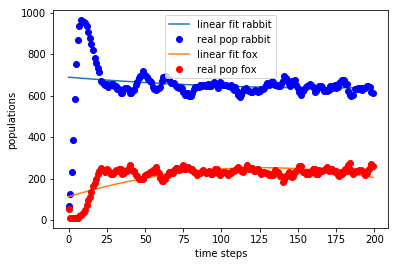

In [7]:
coeff_r = np.polyfit(range(len(rabbit_populations)), rabbit_populations, 2)
model_r = np.polyval(coeff_r, range(len(rabbit_populations)))
coeff_f = np.polyfit(range(len(fox_populations)), fox_populations, 2)
model_f = np.polyval(coeff_f, range(len(fox_populations)))
pylab.plot(model_r, label = "linear fit rabbit")
pylab.plot(rabbit_populations, 'bo', label = 'real pop rabbit')
pylab.plot(model_f, label = "linear fit fox")
pylab.plot(fox_populations, 'bo', label = 'real pop fox', color = 'red')
pylab.xlabel("time steps")
pylab.ylabel("populations")
pylab.legend(loc = "best")
pylab.show()